    ---
    layout: post
    title: Introduction to Pandas 3
    excerpt:
    categories: blog
    tags: ["Python", "Data Science", "Pandas"]
    published: true
    comments: true
    share: true
    ---

Hello all, I am back with another of my notes on Pandas. Today our focus will be grouping, merging and reshaping our data with Pandas. Modifiying data is very fundamental when it comes to data analysis and other core subjects requiring data cleaning. 

## Grouping of Data

The ```groupby``` operation can be thought of as part of a process that involves the following 3 steps:

- Splitting the dataset
- Analyzing the data
- Aggregating or combining the data


The ```groupby``` won't really work with Series since they are 1D object. However can be performed to obtain distinct rows of the Series. 

Dataset we will use taken from [Chris Albon's Web Notes](http://chrisalbon.com/)

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df.head()

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70


Let's apply  ```groupby``` to the DataFrame and see what is the type of the result:

In [3]:
companyGrp = df.groupby('company')
type(companyGrp)

pandas.core.groupby.DataFrameGroupBy

In [4]:
# We can see the groups and the indexes accordingly
companyGrp.groups

{'1st': [0, 1, 4, 5, 8, 9], '2nd': [2, 3, 6, 7, 10, 11]}

In [5]:
# Returns the length of the number of groups
len(companyGrp.groups)

2

In [6]:
# Prints the full sizes of the elements of groups
companyGrp.size()

company
1st    6
2nd    6
dtype: int64

A multicolumn groupby specifies more than one column to be used as the key by
specifying the key columns as a list.

In [7]:
seasonData = pd.read_csv("./data/full_soccer.csv", header=None)
seasonData.columns = ["league", 'date', 'home', 'away', 'hgoal', 'agoal', 'result', 'season']
seasonData.head()

,league,date,home,away,hgoal,agoal,result,season
0,D1,22/08/14,Bayern Munich,Wolfsburg,2,1,H,14-15
1,D1,23/08/14,Dortmund,Leverkusen,0,2,A,14-15
2,D1,23/08/14,Ein Frankfurt,Freiburg,1,0,H,14-15
3,D1,23/08/14,FC Koln,Hamburg,0,0,D,14-15
4,D1,23/08/14,Hannover,Schalke 04,2,1,H,14-15


In [8]:
seasonData = seasonData.set_index('date')
seasonData.head()

,league,home,away,hgoal,agoal,result,season
date,,,,,,,
22/08/14,D1,Bayern Munich,Wolfsburg,2,1,H,14-15
23/08/14,D1,Dortmund,Leverkusen,0,2,A,14-15
23/08/14,D1,Ein Frankfurt,Freiburg,1,0,H,14-15
23/08/14,D1,FC Koln,Hamburg,0,0,D,14-15
23/08/14,D1,Hannover,Schalke 04,2,1,H,14-15


In [9]:
seasonDataGroupbyYear = seasonData.groupby(lambda date: date.split('/')[2])

We can then iterate over the resulting groupby object and display the groups. In the following command, we see the two sets of statistics grouped by year. Note the use of the lambda function to obtain the year group from the first day of the month.

In [10]:
for name, group in seasonDataGroupbyYear:
    print name
    print group

11
         league                home                away  hgoal  agoal result  \
date                                                                           
27/08/11    SP1             Granada               Betis      0      1      A   
27/08/11    SP1            Sp Gijon            Sociedad      1      2      A   
27/08/11    SP1            Valencia           Santander      4      3      H   
28/08/11    SP1          Ath Bilbao           Vallecano      1      1      D   
28/08/11    SP1          Ath Madrid             Osasuna      0      0      D   
28/08/11    SP1              Getafe             Levante      1      1      D   
28/08/11    SP1            Mallorca             Espanol      1      0      H   
28/08/11    SP1             Sevilla              Malaga      2      1      H   
28/08/11    SP1            Zaragoza         Real Madrid      0      6      A   
29/08/11    SP1           Barcelona          Villarreal      5      0      H   
10/09/11    SP1         Real Madrid  

If we wished to group by individual month instead, we would need to apply groupby with a level argument, as follows:

In [11]:
# Same day games
for name, group in (seasonData.groupby(level=0)):
    print name
    print group
    print "\n"

01/01/13
         league          home                away  hgoal  agoal result season
date                                                                         
01/01/13     E2     Brentford         Bournemouth      0      0      D  12-13
01/01/13     E2          Bury            Tranmere      0      1      A  12-13
01/01/13     E2      Coventry          Shrewsbury      0      1      A  12-13
01/01/13     E2  Crawley Town          Colchester      3      0      H  12-13
01/01/13     E2         Crewe            Carlisle      1      0      H  12-13
01/01/13     E2     Doncaster    Sheffield United      2      2      D  12-13
01/01/13     E2    Hartlepool             Preston      0      1      A  12-13
01/01/13     E2  Notts County  Milton Keynes Dons      1      2      A  12-13
01/01/13     E2    Scunthorpe              Oldham      2      2      D  12-13
01/01/13     E2       Swindon          Portsmouth      5      0      H  12-13
01/01/13     E2       Walsall           Stevenage      

Note that since in the preceding commands we're grouping on an index, we need to specify the level argument as opposed to just using a column name. When we group by multiple keys, the resulting group name is a tuple, as shown in the upcoming commands. First, we reset the index to obtain the original DataFrame and define a MultiIndex in order to be able to group by multiple keys. If this is not done, it will result in a ```ValueError``` :

In [12]:
seasonData = seasonData.reset_index()

In [13]:
seasonData = seasonData.set_index(['date', 'league'])

In [14]:
dateAndLeague = seasonData.groupby(level=['date', 'league'])

In [15]:
for name, group in dateAndLeague:
    print(name)
    print(group)

('01/01/13', 'E2')
                         home                away  hgoal  agoal result season
date     league                                                              
01/01/13 E2         Brentford         Bournemouth      0      0      D  12-13
         E2              Bury            Tranmere      0      1      A  12-13
         E2          Coventry          Shrewsbury      0      1      A  12-13
         E2      Crawley Town          Colchester      3      0      H  12-13
         E2             Crewe            Carlisle      1      0      H  12-13
         E2         Doncaster    Sheffield United      2      2      D  12-13
         E2        Hartlepool             Preston      0      1      A  12-13
         E2      Notts County  Milton Keynes Dons      1      2      A  12-13
         E2        Scunthorpe              Oldham      2      2      D  12-13
         E2           Swindon          Portsmouth      5      0      H  12-13
         E2           Walsall           Steve

In [16]:
seasonData.head(3)

home        away  hgoal  agoal result season
date     league                                                       
22/08/14 D1      Bayern Munich   Wolfsburg      2      1      H  14-15
23/08/14 D1           Dortmund  Leverkusen      0      2      A  14-15
         D1      Ein Frankfurt    Freiburg      1      0      H  14-15

Suppose we wish to compute the total number of goals scored by home team and away team in each date. We can achieve that by grouping the data by date column and calling sum() function on the that data.

In [17]:
grouped2Data = seasonData.groupby(level='date')
(grouped2Data.sum()).head()

,hgoal,agoal
date,,
01/01/13,18,9
01/01/14,14,13
01/02/12,18,9
01/02/13,10,12
01/02/14,39,21


We can achieve the same results without creating a new data frame and by calling the level as sum function's parameter:

In [18]:
(seasonData.sum(level='date')).head()

,hgoal,agoal
date,,
01/01/13,18,9
01/01/14,14,13
01/02/12,18,9
01/02/13,10,12
01/02/14,39,21


In [19]:
totalgoal = grouped2Data.sum()

In [20]:
# I just wanted to see the percentages of home-away goal number in given dates
totalgoal['hgoal']/totalgoal['agoal']

date
01/01/13    2.000000
01/01/14    1.076923
01/02/12    2.000000
01/02/13    0.833333
01/02/14    1.857143
01/02/15    1.809524
01/02/16    1.000000
01/03/13    1.500000
01/03/14    2.769231
01/03/15    0.727273
01/03/16    1.769231
01/04/12    1.631579
01/04/13    3.833333
01/04/14    2.000000
01/04/15    0.000000
01/04/16         inf
01/05/12    1.400000
01/05/15         inf
01/05/16    2.000000
01/06/13    1.533333
01/09/12    1.275862
01/09/13    1.344828
01/10/11    1.216216
01/10/12    1.000000
01/11/12    0.000000
01/11/13    4.500000
01/11/14    1.032258
01/11/15    1.500000
01/12/12    1.375000
01/12/13    1.714286
              ...   
30/10/12    1.000000
30/10/13    1.368421
30/10/14    1.000000
30/10/15    1.200000
30/11/12    1.750000
30/11/13    1.272727
30/11/14    1.411765
30/11/15    2.500000
30/12/11    3.000000
30/12/15    2.500000
31/01/12    0.666667
31/01/14    0.833333
31/01/15    1.129032
31/01/16    2.272727
31/03/12    0.850000
31/03/13    1.133333
31/03/14

In [21]:
# This has inf values inside so I need to change inf to 0
num_array = (totalgoal['hgoal'] / totalgoal['agoal']).values

In [22]:
# If inf and nan change to 0
num_array[num_array == np.inf] = 0
num_array = np.nan_to_num(num_array)

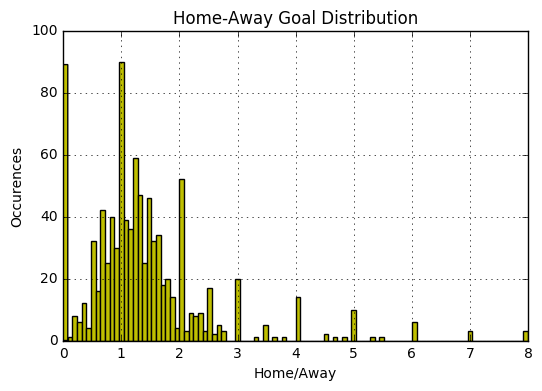

In [23]:
# the histogram of the data
plt.hist(num_array, bins=100, facecolor='y')

plt.xlabel('Home/Away')
plt.ylabel('Occurences')
plt.title('Home-Away Goal Distribution')
plt.axis([0.0, 8.0, 0, 100])
plt.grid(True)

plt.show()

## Merging and Joining

There are various functions that can be used to merge and join pandas' data structures, which include the following functions:

- ```concat```
- ```append```

### The ```concat``` function

The concat function is used to join multiple pandas' data structures along a specified axis and possibly perform union or intersection operations along other axes.

    concat(objs, axis=0, , join='outer', join_axes=None, ignore_index=False,
    keys=None, levels=None, names=None, verify_integrity=False)

_The synopsis of the elements of concat function are as follows:_

- The ```objs``` parameter: A list or dictionary of Series, DataFrame, or Panel objects to be concatenated.
- The ```axis``` parameter: The axis along which the concatenation should be performed. 0 is the default value.
- The ```join``` parameter: The type of join to perform when handling indexes on other axes. The 'outer' function is the default.
- The ```join_axes``` parameter: This is used to specify exact indexes for the remaining indexes instead of doing outer/inner join.
- The ```keys``` parameter: This specifies a list of keys to be used to construct a MultiIndex.

Check more parameter features in the [official documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html)

We will use the Yahoo Finance's stock data of Apple, Amazon, Facebook, Google, Twitter, and Yahoo. Pandas library has a great API interface for Yahoo and Google Finance. It is really efficient and conveniet. Let's see how we can do it.

In [25]:
import pandas_datareader.data as web # The Library to call
import datetime   # Just for getting time

In [45]:
stocks = ["AAPL", "AMZN", "FB", "GOOG", "TWTR", "YHOO"] # Specify the stocks to get
start = datetime.datetime(2015, 1, 1) # Start time 
end = datetime.datetime(2016, 1, 27) # End time

# We will have daily data.
# Get the stock data from yahoo and using stocks list
df = web.DataReader(stocks, 'yahoo', start, end) # Returns a Panel
df = df.to_frame() # Convert to dataframe and reset the indexes

In [46]:
df.head()

Open        High         Low       Close      Volume  \
Date       minor                                                               
2015-01-02 AAPL   111.389999  111.440002  107.349998  109.330002  53204600.0   
           AMZN   312.579987  314.750000  306.959991  308.519989   2783200.0   
           FB      78.580002   78.930000   77.699997   78.449997  18177500.0   
           GOOG   529.012399  531.272382  524.102388  524.812404   1447500.0   
           TWTR    36.230000   36.740002   35.540001   36.560001  12062500.0   

                   Adj Close  
Date       minor              
2015-01-02 AAPL   105.158716  
           AMZN   308.519989  
           FB      78.449997  
           GOOG   524.812404  
           TWTR    36.560001

In [54]:
# Slicing the data, taking the first 4 row and Adj Close and Open 
A = df.ix[:4, ['Adj Close', 'Open']] 
A

Adj Close        Open
Date       minor                        
2015-01-02 AAPL   105.158716  111.389999
           AMZN   308.519989  312.579987
           FB      78.449997   78.580002
           GOOG   524.812404  529.012399

In [55]:
B = df.ix[2:10, ['Volume']]
B

Volume
Date       minor            
2015-01-02 FB     18177500.0
           GOOG    1447500.0
           TWTR   12062500.0
           YHOO   11924500.0
2015-01-05 AAPL   64285500.0
           AMZN    2774200.0
           FB     26452200.0
           GOOG    2059800.0

In [56]:
C = df.ix[1:5, ['Low']]
C

Low
Date       minor            
2015-01-02 AMZN   306.959991
           FB      77.699997
           GOOG   524.102388
           TWTR    35.540001

Here, we perform a concatenation by specifying an outer join, which concatenates and performs a union on all the three data frames, and includes entries that do not have values for all the columns by inserting ```NaN``` for such columns

In [57]:
pd.concat([A,B,C], axis=1) # Outer Join -> axis=1

Adj Close        Open      Volume         Low
Date       minor                                                
2015-01-02 AAPL   105.158716  111.389999         NaN         NaN
           AMZN   308.519989  312.579987         NaN  306.959991
           FB      78.449997   78.580002  18177500.0   77.699997
           GOOG   524.812404  529.012399   1447500.0  524.102388
           TWTR          NaN         NaN  12062500.0   35.540001
           YHOO          NaN         NaN  11924500.0         NaN
2015-01-05 AAPL          NaN         NaN  64285500.0         NaN
           AMZN          NaN         NaN   2774200.0         NaN
           FB            NaN         NaN  26452200.0         NaN
           GOOG          NaN         NaN   2059800.0         NaN

Here is another illustration of concat , but this time, it is on random statistical distributions. Note that in the absence of an axis argument, the default axis of concatenation is 0 :

In [58]:
np.random.seed(100)
normDF =pd.DataFrame(np.random.randn(3,4))
normDF

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163


In [59]:
binomDF=pd.DataFrame(np.random.binomial(100,0.5,(3,4)))
binomDF

,0,1,2,3
0,57,50,57,50
1,48,56,49,43
2,40,47,49,55


In [60]:
poissonDF=pd.DataFrame(np.random.poisson(100,(3,4)))
poissonDF

,0,1,2,3
0,93,96,96,89
1,76,96,104,103
2,96,93,107,84


In [61]:
rand_distribs=[normDF,binomDF,poissonDF]
rand_distribsDF=pd.concat(rand_distribs,keys=['Normal', 'Binomial', 'Poisson'])
rand_distribsDF

0          1           2           3
Normal   0  -1.749765   0.342680    1.153036   -0.252436
         1   0.981321   0.514219    0.221180   -1.070043
         2  -0.189496   0.255001   -0.458027    0.435163
Binomial 0  57.000000  50.000000   57.000000   50.000000
         1  48.000000  56.000000   49.000000   43.000000
         2  40.000000  47.000000   49.000000   55.000000
Poisson  0  93.000000  96.000000   96.000000   89.000000
         1  76.000000  96.000000  104.000000  103.000000
         2  96.000000  93.000000  107.000000   84.000000

### Using ```append``` function
The append function is a simpler version of concat that concatenates along axis=0. Here is an illustration of its use where we slice out the first two rows and first three columns of the stockData DataFrame:

In [64]:
stockDataDFA = stockDataDF.ix[:2,:3]
stockDataDFB = stockDataDF[2:]

In [66]:
stockDataDFA.append(stockDataDFB).head()

,Adj Close,Close,Date,High,Low,Open,Volume
0,NaN,NaN,2015-01-02,111.440002,NaN,111.389999,NaN
1,NaN,NaN,2015-01-05,108.650002,NaN,108.290001,NaN
2,NaN,NaN,2015-01-06,107.430000,NaN,106.540001,NaN
2,102.205846,106.260002,2015-01-06,107.430000,104.629997,106.540001,65797100.0
3,103.638996,107.750000,2015-01-07,108.199997,106.699997,107.199997,40105900.0


### Appending a single row to a DataFrame
We can append a single row to a DataFrame by passing a series or dictionary to the append method:

In [67]:
algos={'search':['DFS','BFS','Binary Search','Linear'],
       'sorting': ['Quicksort','Mergesort','Heapsort','Bubble Sort'],
       'machine learning':['RandomForest','K Nearest Neighbor','LogisticRegression','K-Means Clustering']}
algoDF=pd.DataFrame(algos)
algoDF

,machine learning,search,sorting
0,RandomForest,DFS,Quicksort
1,K Nearest Neighbor,BFS,Mergesort
2,LogisticRegression,Binary Search,Heapsort
3,K-Means Clustering,Linear,Bubble Sort


In [68]:
moreAlgos={'search': 'ShortestPath',
           'sorting': 'Insertion Sort',
           'machine learning': 'Linear Regression'}
algoDF.append(moreAlgos, ignore_index=True)

,machine learning,search,sorting
0,RandomForest,DFS,Quicksort
1,K Nearest Neighbor,BFS,Mergesort
2,LogisticRegression,Binary Search,Heapsort
3,K-Means Clustering,Linear,Bubble Sort
4,Linear Regression,ShortestPath,Insertion Sort


In order for this to work, you must pass the ```ignore_index=True``` argument so that the index [0,1,2,3] in ```algoDF``` is ignored.

## Summary
In this tutorial, we saw that there are various ways to rearrange data in pandas. We can group data using the pandas.groupby operator and the associated methods on groupby objects. We can merge and join Series and DataFrame objects using the ```concat```, ```append```, and ```merge``` functions.